# Consumo de Alcohol en Adolescentes
Siguiendo el libro "Aprende Machine Learning con Scikit-Learn, Keras y Tensorflow" Ejecutaré un proyecto de Machine Learning.

# Data Download


In [13]:
!kaggle datasets download -d uciml/student-alcohol-consumption

student-alcohol-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile

with zipfile.ZipFile('student-alcohol-consumption.zip', 'r') as zip_ref:
    zip_ref.extractall('student-alcohol-consumption')


# Data Overview

In [15]:
import pandas as pd
#Load the datasets
math_data = pd.read_csv('student-alcohol-consumption/student-mat.csv')
port_data = pd.read_csv('student-alcohol-consumption/student-por.csv')

print(math_data.head())
print(port_data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [16]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
port_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Merge

In [18]:
d1 = math_data
d2 = port_data

#Perform the merge
df = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
print(f"Number of students in the merged dataset: {len(df)}")  # Should print 382


Number of students in the merged dataset: 382


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

### Value Counts of object types

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Value Counts for column {column}:\n{df[column].value_counts()}\n")

Value Counts for column school:
school
GP    342
MS     40
Name: count, dtype: int64

Value Counts for column sex:
sex
F    198
M    184
Name: count, dtype: int64

Value Counts for column address:
address
U    301
R     81
Name: count, dtype: int64

Value Counts for column famsize:
famsize
GT3    278
LE3    104
Name: count, dtype: int64

Value Counts for column Pstatus:
Pstatus
T    344
A     38
Name: count, dtype: int64

Value Counts for column Mjob:
Mjob
other       138
services     96
teacher      62
at_home      53
health       33
Name: count, dtype: int64

Value Counts for column Fjob:
Fjob
other       211
services    107
teacher      31
health       17
at_home      16
Name: count, dtype: int64

Value Counts for column reason:
reason
course        140
home          110
reputation     98
other          34
Name: count, dtype: int64

Value Counts for column guardian_x:
guardian_x
mother    275
father     91
other      16
Name: count, dtype: int64

Value Counts for column schoolsup_x:

In [21]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

              age        Medu        Fedu  traveltime_x  studytime_x  \
count  382.000000  382.000000  382.000000    382.000000   382.000000   
mean    16.586387    2.806283    2.565445      1.442408     2.034031   
std      1.173470    1.086381    1.096240      0.695378     0.845798   
min     15.000000    0.000000    0.000000      1.000000     1.000000   
25%     16.000000    2.000000    2.000000      1.000000     1.000000   
50%     17.000000    3.000000    3.000000      1.000000     2.000000   
75%     17.000000    4.000000    4.000000      2.000000     2.000000   
max     22.000000    4.000000    4.000000      4.000000     4.000000   

       failures_x    famrel_x  freetime_x     goout_x      Dalc_x      Walc_x  \
count  382.000000  382.000000  382.000000  382.000000  382.000000  382.000000   
mean     0.290576    3.939791    3.222513    3.112565    1.473822    2.280105   
std      0.729481    0.921620    0.988233    1.131927    0.886229    1.282866   
min      0.000000    1.0000

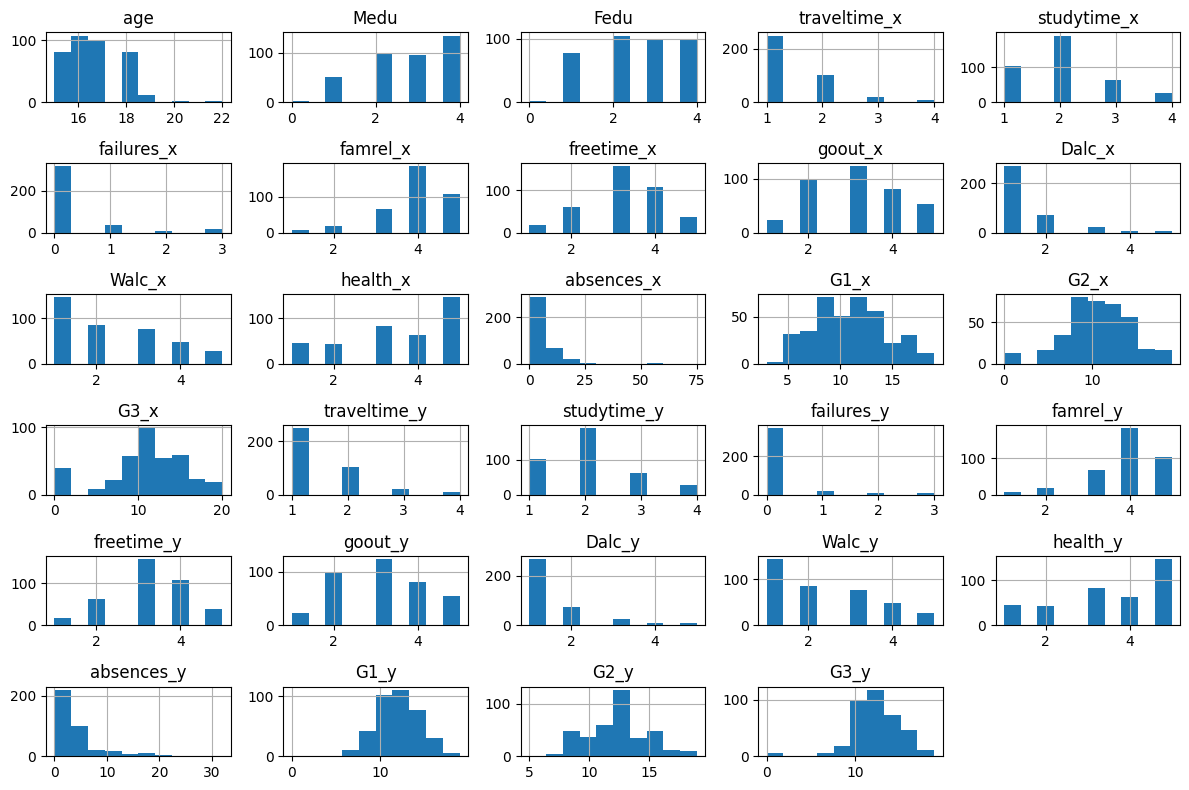

In [22]:
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')

# Plot histograms for each numeric column
numeric_columns.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()
